In [3]:
# logistic Regression 

import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

pickle_file = 'housingNantes.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']

  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)

image_size = train_dataset.shape[1]

('Training set', (457, 56, 56), (457, 1))
('Validation set', (196, 56, 56), (196, 1))


In [4]:
# clean prices == 0

price_equals_zero_list = []

for i,price in enumerate(train_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = train_labels.shape[0]-len(price_equals_zero_list)

train_labels_no_zeros = np.zeros((new_dim, 1))
train_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(train_labels):
    if price != 0:
        train_labels_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(train_dataset):
    if i not in price_equals_zero_list:
        train_images_no_zeros[j,:,:] = image  
        j += 1

        
        
# for validation:

price_equals_zero_list = []

for i,price in enumerate(valid_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = valid_labels.shape[0]-len(price_equals_zero_list) 

valid_labels_no_zeros = np.zeros((new_dim, 1))
valid_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(valid_labels):
    if price != 0:
        valid_labels_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(valid_dataset):
    if i not in price_equals_zero_list:
        valid_images_no_zeros[j,:,:] = image  
        j += 1        

11
6


In [5]:
train_labels = train_labels_no_zeros
valid_labels = valid_labels_no_zeros

In [6]:
# reformat 
train_images = train_images_no_zeros.reshape((-1, image_size * image_size)).astype(np.float32)
valid_images = valid_images_no_zeros.reshape((-1, image_size * image_size)).astype(np.float32)

num_labels= 1

dtype = np.float32

In [76]:

graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation into constants that are
  # attached to the graph.
    tf_train_images = tf.placeholder(dtype, shape=[None,image_size * image_size])
    tf_train_price = tf.placeholder(dtype, shape=[None,train_labels_cat.shape[1],train_labels_cat.shape[2]])
    tf_valid_images = tf.placeholder(dtype, shape=[None,image_size * image_size])
  
  # Variables.
  # These are the parameters that we are going to be training. The weight
  # matrix will be initialized using random values following a (truncated)
  # normal distribution. The biases get initialized to zero.
    weights = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  # We multiply the inputs with the weight matrix, and add biases. We compute
  # the loss as the difference between price estimated and real prices.
    
    price_estimation = tf.matmul(tf_train_images, weights) + biases
       
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_price, logits=price_estimation))
    
  # Optimizer.
  # We are going to find the minimum of this loss using AdagradOptimizer.
  #  AdagradOptimizer
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training and validation.
    train_prediction = price_estimation
    valid_prediction = tf.matmul(tf_valid_images, weights) + biases

In [124]:
num_steps = 3001

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == labels)
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, predictions,valid_predictions = session.run([optimizer, loss, train_prediction,valid_prediction]
                                        , feed_dict={tf_train_images: train_images,tf_train_price: train_labels_cat,tf_valid_images: valid_images })
    if (step % 100 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, precision_train_labels))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_predictions, precision_valid_labels))

Initialized
Loss at step 0: 20.478220
Training accuracy: 9.2%
Validation accuracy: 7.9%
Loss at step 100: 2.619740
Training accuracy: 46.6%
Validation accuracy: 12.6%
Loss at step 200: 0.943517
Training accuracy: 72.4%
Validation accuracy: 10.5%
Loss at step 300: 0.644522
Training accuracy: 80.0%
Validation accuracy: 9.5%
Loss at step 400: 0.501004
Training accuracy: 82.1%
Validation accuracy: 10.5%
Loss at step 500: 0.465240
Training accuracy: 82.5%
Validation accuracy: 9.5%
Loss at step 600: 0.387563
Training accuracy: 84.1%
Validation accuracy: 10.0%
Loss at step 700: 0.438957
Training accuracy: 83.6%
Validation accuracy: 8.4%
Loss at step 800: 0.366373
Training accuracy: 84.1%
Validation accuracy: 9.5%
Loss at step 900: 0.430977
Training accuracy: 84.3%
Validation accuracy: 10.5%
Loss at step 1000: 0.397396
Training accuracy: 84.8%
Validation accuracy: 10.5%
Loss at step 1100: 0.361153
Training accuracy: 84.8%
Validation accuracy: 11.1%
Loss at step 1200: 0.335105
Training accuracy

In [116]:
# make categories of prices

from scipy import stats

stats.describe(train_labels)

DescribeResult(nobs=446, minmax=(array([ 12000.]), array([ 1860000.])), mean=array([ 269818.29147982]), variance=array([  5.09068459e+10]), skewness=array([ 2.84060569]), kurtosis=array([ 11.9724932]))

In [15]:
stats.describe(valid_labels)

DescribeResult(nobs=190, minmax=(array([ 29074.]), array([ 1860000.])), mean=array([ 303723.85263158]), variance=array([  8.97267923e+10]), skewness=array([ 2.60833285]), kurtosis=array([ 7.75341929]))

In [23]:
np.min([np.min(train_labels),np.min(valid_labels)])

12000.0

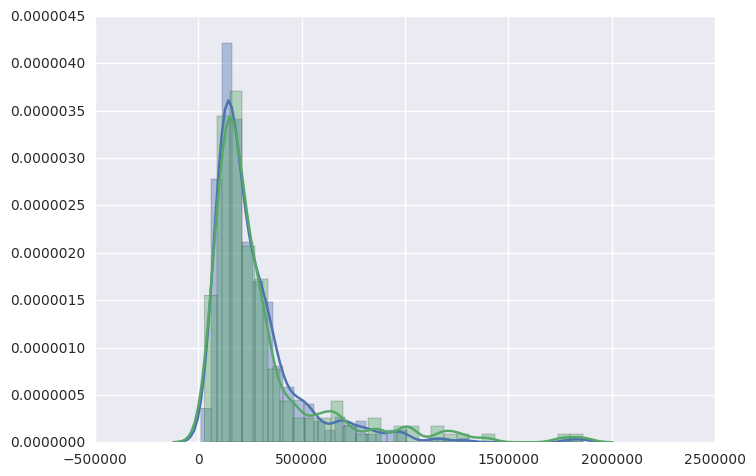

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(train_labels)
sns.distplot(valid_labels)
plt.show()



In [34]:
# a majority of prices are between 0 and 500000 euros
# so better use quartiles than fixed sizes for categories of price

quartiles = 

upper_limit = np.percentile(train_labels, 10)




120000.0

In [58]:
train_categories = np.zeros((train_labels.shape[0],train_labels.shape[1]))
valid_categories = np.zeros((valid_labels.shape[0],valid_labels.shape[1]))


for quartile in xrange(0, 100, 10):
    #print i
    for i in range(len(train_labels)):
        #print quartile
        if train_labels[i] > np.percentile(train_labels, quartile) and train_labels[i] < np.percentile(train_labels, quartile+10):
            train_categories[i] = quartile / 10 
            

for quartile in xrange(0, 100, 10):
    #print i
    for i in range(len(valid_labels)):
        #print quartile
        if valid_labels[i] > np.percentile(train_labels, quartile) and valid_labels[i] < np.percentile(train_labels, quartile+10):
            valid_categories[i] = quartile / 10     

In [66]:
# reformat one-hot encoding

num_labels = 10

train_labels_cat = (np.arange(num_labels) == train_categories[:,None]).astype(np.float32)
valid_labels_cat = (np.arange(num_labels) == valid_categories[:,None]).astype(np.float32)

In [70]:
train_labels_cat[2]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]], dtype=float32)

In [78]:
predictions

array([[  7.33135033,  -1.62427831,  -7.09939718, ...,  10.11676121,
         -4.41688347,   2.99096274],
       [  5.57628822,   4.23776436,  -2.28838444, ...,  -8.19786358,
          4.79853678,   4.83172941],
       [  9.36857224,  -5.36765289,   3.34917283, ...,  -0.98330379,
         14.83210754,  -2.34350634],
       ..., 
       [ -5.68732834,  -1.69615912,  -9.56957054, ...,   7.11015034,
         -5.91413498,   4.21804523],
       [ 13.71513748,   1.89317203,   6.15576982, ...,  -6.05473423,
         12.35378933,  14.72682762],
       [  1.01138186,  14.04428577,   8.33904648, ...,   2.27134752,
         -4.29599619,  -5.76207495]], dtype=float32)

In [75]:
train_labels_cat

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  1.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  1.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]]], dtype=float32)

In [80]:
100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(train_labels_cat, 1) / predictions.shape[0])

/Users/alex/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


0.0

In [86]:
predictions.shape
train_labels_cat.shape

(446, 1, 10)

In [88]:
train_labels_cat

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  1.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  1.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.]]], dtype=float32)

In [95]:
np.argmax(predictions, 1).shape

(446,)

In [98]:
np.argmax(train_categories,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [99]:
predictions.shape

(446, 10)

In [102]:
train_labels_cat.shape

(446, 1, 10)

In [121]:
precision_train_labels = np.zeros((train_labels_cat.shape[0]))

precision_valid_labels = np.zeros((valid_labels_cat.shape[0]))

In [122]:
for i in range(len(precision_train_labels)):

    precision_train_labels[i] = train_categories[i][0]
    
for i in range(len(precision_valid_labels)):

    precision_valid_labels[i] = valid_categories[i][0]

In [107]:
train_categories[0][0]

4.0

In [112]:
train_categories[1][0]

8.0

In [114]:
precision_train_labels

array([ 4.,  8.,  8.,  2.,  0.,  1.,  3.,  9.,  9.,  0.,  2.,  4.,  1.,
        4.,  0.,  6.,  3.,  1.,  8.,  0.,  0.,  5.,  3.,  3.,  6.,  9.,
        8.,  4.,  8.,  7.,  2.,  9.,  3.,  6.,  6.,  9.,  9.,  9.,  2.,
        7.,  4.,  6.,  6.,  2.,  4.,  8.,  8.,  7.,  4.,  4.,  9.,  7.,
        5.,  4.,  0.,  1.,  4.,  7.,  8.,  6.,  6.,  8.,  0.,  5.,  0.,
        5.,  1.,  7.,  3.,  5.,  6.,  4.,  9.,  2.,  8.,  5.,  3.,  9.,
        6.,  6.,  2.,  0.,  7.,  9.,  5.,  3.,  1.,  0.,  8.,  0.,  1.,
        7.,  3.,  8.,  5.,  9.,  6.,  3.,  1.,  5.,  1.,  0.,  5.,  9.,
        1.,  3.,  9.,  0.,  3.,  7.,  3.,  7.,  5.,  6.,  1.,  4.,  0.,
        1.,  4.,  0.,  7.,  9.,  1.,  9.,  3.,  7.,  0.,  1.,  8.,  7.,
        6.,  3.,  6.,  9.,  4.,  2.,  8.,  5.,  2.,  9.,  4.,  7.,  7.,
        5.,  6.,  7.,  9.,  2.,  7.,  5.,  3.,  5.,  1.,  8.,  5.,  9.,
        2.,  2.,  9.,  6.,  4.,  8.,  6.,  2.,  5.,  6.,  3.,  6.,  0.,
        0.,  3.,  2.,  0.,  5.,  1.,  4.,  2.,  0.,  6.,  7.,  0

In [117]:
100.0 * np.sum(np.argmax(predictions, 1) == precision_train_labels / predictions.shape[0])

0.0

In [123]:
precision_valid_labels

array([ 7.,  4.,  0.,  4.,  0.,  3.,  6.,  9.,  7.,  1.,  7.,  2.,  3.,
        3.,  3.,  9.,  5.,  6.,  0.,  8.,  1.,  9.,  4.,  0.,  6.,  0.,
        3.,  4.,  2.,  0.,  8.,  6.,  7.,  5.,  3.,  8.,  2.,  4.,  3.,
        7.,  6.,  5.,  0.,  6.,  2.,  9.,  3.,  2.,  6.,  1.,  5.,  4.,
        2.,  8.,  7.,  9.,  9.,  3.,  6.,  6.,  0.,  9.,  3.,  4.,  3.,
        8.,  3.,  5.,  0.,  7.,  5.,  0.,  6.,  6.,  0.,  2.,  8.,  9.,
        2.,  2.,  3.,  9.,  5.,  9.,  5.,  0.,  0.,  5.,  8.,  2.,  3.,
        3.,  0.,  0.,  1.,  9.,  5.,  6.,  3.,  3.,  9.,  4.,  5.,  9.,
        0.,  0.,  4.,  1.,  5.,  9.,  5.,  9.,  0.,  0.,  9.,  2.,  9.,
        9.,  4.,  3.,  9.,  0.,  3.,  6.,  0.,  7.,  6.,  3.,  7.,  6.,
        5.,  7.,  9.,  0.,  7.,  1.,  7.,  7.,  2.,  5.,  6.,  8.,  0.,
        9.,  2.,  3.,  4.,  4.,  7.,  9.,  2.,  1.,  6.,  8.,  9.,  6.,
        1.,  9.,  8.,  8.,  5.,  9.,  4.,  4.,  3.,  4.,  9.,  7.,  4.,
        6.,  4.,  6.,  5.,  1.,  4.,  0.,  4.,  1.,  7.,  2.,  1

array([[ -8.85281181, -13.93787956, -11.11027813, ...,   0.48715883,
          1.58398938,   2.55440116],
       [  2.0066402 ,   0.59262478,  -6.14839315, ...,  -8.38653278,
          1.16062999,   1.12383771],
       [  2.63591337,  -5.67734957,   1.85741091, ..., -15.5220089 ,
         13.78565407,   0.56766248],
       ..., 
       [  0.72635114, -13.28945827,   0.01799798, ...,   9.48392677,
         10.70045662,  10.81115055],
       [  1.77655196,  -4.99360847,   0.12558502, ...,   0.20073444,
        -11.31031036,   3.01576209],
       [  4.22537327,  11.74582005,   3.19514561, ...,  -3.5390203 ,
        -13.44187927,  -0.50579572]], dtype=float32)